# Laboration - Covid-19



## Setup

In [40]:
import pandas as pd
import plotly
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Load Swedish C19 data
c19sweden = pd.read_excel(
    "Folkhalsomyndigheten_Covid19.xlsx",
    sheet_name="Veckodata Riket"
)

## 1a) Överblick över data

- veckonummerkolumnen nollställs vid årsskifte

- 13 kolumner och 89 rader, mestadels int, men två har floats

- Kolumnnamn:

['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv']

In [22]:
c19sweden.iloc[45:55]
c19sweden.tail()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976
88,2021,41,4062,39,79,1162506,11200,10,7886,18,1.7,14944,1439.800049


In [23]:
c19sweden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [24]:
c19sweden.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

## 1b) Slå ihop år och veckonummer

Så att det står ÅR v VECKONUMMER: "2020v12"

In [25]:
c19sweden["Vecka"] = c19sweden["år"].astype(str) + "v" + c19sweden["veckonummer"].astype(str)

# Check
c19sweden["Vecka"]

0      2020v6
1      2020v7
2      2020v8
3      2020v9
4     2020v10
       ...   
84    2021v37
85    2021v38
86    2021v39
87    2021v40
88    2021v41
Name: Vecka, Length: 89, dtype: object

## 1c-f) Rita diagram

In [26]:
# Rename columns to easily get nice plot labels

# backup copy of the original data set
c19swedenold = c19sweden.copy

# New column names
labels = [
    'År', 
    'Veckonummer', 
    'Antal fall per vecka', 
    'Antal fall per 100000inv och vecka',
    'Antal fall per 100000inv och 14 dagar', 
    'Kum. antal fall per vecka', 
    'Kum. antal fall per 100000inv och vecka',
    'Antal nya intensivvårdade per vecka', 
    'Kum. antal intensivvårdade per vecka',
    'Antal avlidna per vecka', 
    'Antal avlidna per miljon inv. och vecka',
    'Kum. antal avlidna per vecka', 
    'Kum. antal avlidna per miljon inv. och vecka'
]

c19sweden = c19sweden.rename({
    oldcolumn:label for (oldcolumn,label) in zip(c19sweden.columns,labels)
}, axis="columns")

# Print to check (and for later reference)
for column in c19sweden.columns:
    print(column)


År
Veckonummer
Antal fall per vecka
Antal fall per 100000inv och vecka
Antal fall per 100000inv och 14 dagar
Kum. antal fall per vecka
Kum. antal fall per 100000inv och vecka
Antal nya intensivvårdade per vecka
Kum. antal intensivvårdade per vecka
Antal avlidna per vecka
Antal avlidna per miljon inv. och vecka
Kum. antal avlidna per vecka
Kum. antal avlidna per miljon inv. och vecka
Vecka


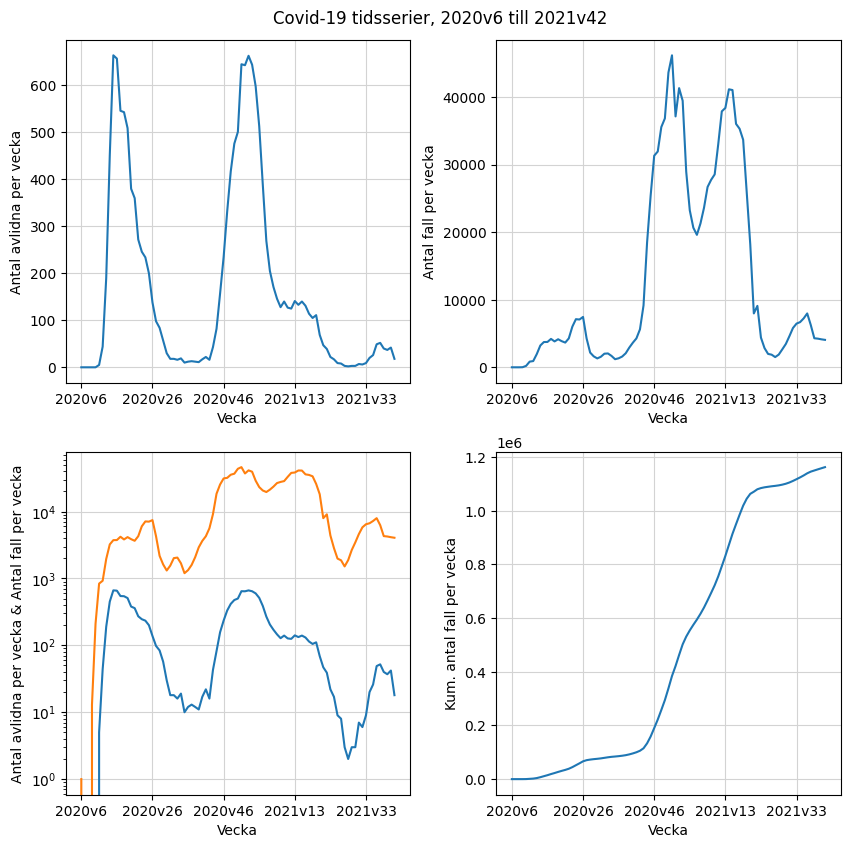

In [29]:
# With seaborn

# Define a plot function (move to a separate py-file later?)
def snsline(data, xparam, yparam, xlabel, ylabel, ax):
    # General plot settings
    ax.set(ylabel=ylabel, xlabel=xlabel)
    ax.set_xticks(list(range(0,len(c19sweden[xparam]),20)))
    ax.grid(color="lightgray")
    plt.subplots_adjust(wspace = 0.25)

    # Plot code
    sns.lineplot(
        data=data,
        x=xparam, y=yparam,
        ax=ax
    )

# Set up of subplots and other settings
fig,ax = plt.subplots(
    2,2, 
    dpi=100,
    figsize=(10,10)
)
fig.suptitle("Covid-19 tidsserier, 2020v6 till 2021v42",y=0.91)
fig.set_facecolor("white")

# Lists with plot parameters and plot labels
xlabel = "Vecka"
ylabels = [
    "Antal avlidna per vecka",
    "Antal fall per vecka",
   ["Antal avlidna per vecka","Antal fall per vecka"],
    "Kum. antal fall per vecka"
]

# So this will plots
# 1c avlidna fall per vecka, 2020v6 to now
# 1d nya fall per vecka, 2020v6 to now.
# 1e avlidna fall per vecka & nya fall per vecka, 2020v6 to now
# 1f kumulativt antal fall, 2020v6 to now

for n in range(ax.size):
    subp_coord = (n//2,(n-2)%2) # Gives 0,0 ; 0,1 ; 1,0 ; and 1,1

    if len(ylabels[n]) == 2:
        ylabel = ylabels[n][0]+" & "+ylabels[n][1]
        snsline(c19sweden, xlabel, ylabels[n][0], xlabel, ylabel, ax[subp_coord])
        snsline(c19sweden, xlabel, ylabels[n][1], xlabel, ylabel, ax[subp_coord])
        ax[subp_coord].set_yscale("log")
    else:
        snsline(c19sweden, xlabel, ylabels[n], xlabel, ylabels[n], ax[subp_coord])

# save figure: 1cdef_seaborn.png
fig.savefig("visualiseringar/1cdef_seaborn.png")


In [41]:
# With plotly express

# So this will plots
# 1c avlidna fall per vecka, 2020v6 to now
# 1d nya fall per vecka, 2020v6 to now.
# 1e avlidna fall per vecka & nya fall per vecka, 2020v6 to now
# 1f kumulativt antal fall, 2020v6 to now

# List of file names
filenames = [
    "1c_avlidnavecka",
    "1d_fallvecka",
    "1e_avlidnafall",
    "1f_kumfall"
]


for ylabel,file in zip(ylabels,filenames):
    # The double plot window should be logscaled
    if len(ylabel) == 2:
        linlog = True
    else:
        linlog = False

    # Plot
    fig = px.line(
        c19sweden, x=xlabel, y=ylabel, log_y=linlog
    )
    fig.show()
    
    # Save figures as html files
    #print(f"visualiseringar/{file}_plotlyx.html")
    plotly.offline.plot(fig, filename=f"visualiseringar/{file}_plotlyx.html")


# Uppgift 2 - uppvärmning vaccindata

I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.
Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

## a) Hur många län finns representerade i datasetet?

In [ ]:
# Load Swedish C19-vaccination data
c19se_vaccine = pd.read_excel(
    "Folkhalsomyndigheten_Covid19_Vaccine.xlsx",
    sheet_name="Vaccinerade kommun och ålder"
)

c19se_vaccine.columns

b) Hur många kommuner finns representerade i datasetet?

c) Hur stor är befolkningen som är representerad i datasetet?

d) Beräkna hur många barn under 16 år det finns i Sverige. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.

e) Rita stapeldiagram för andel med minst 1 dos per län och andel färdigvaccinerade per län

f) Rita ett stapeldiagram med län i x-axeln och staplar för befolkning > 16år, antal minst 1 dos och antal färdigvaccinerade.